### Citibike Analysis

In [85]:
import os
from dotenv import load_dotenv

from google.cloud import bigquery
from google.api_core.exceptions import NotFound, BadRequest


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
load_dotenv()

True

In [3]:
client = bigquery.Client()

bq_project_id = os.getenv('GCP_PROJECT_ID')
bq_dataset_name = os.getenv('BQ_DATASET')
bq_table_name = os.getenv('BQ_TABLE')

table_red = f'{bq_project_id}.{bq_dataset_name}.{bq_table_name}'
cleaned_table_ref = f'{bq_project_id}.{bq_dataset_name}.{bq_table_name}_cleaned'

In [4]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,5A710F57753EB7C0,classic_bike,2024-11-14 08:54:24.894000+00:00,2024-11-14 09:00:00.371000+00:00,67 St & Erik Pl,2733.03,Keegan Rd & 2 Ave,3019.03,40.633385,-74.016562,40.642431,-74.025536,casual,None,None
1,BF5C213FF0ECD6A3,classic_bike,2024-11-20 20:46:49.666000+00:00,2024-11-20 21:11:42.819000+00:00,5 Ave & 67 St,2782.02,5 Ave & 67 St,2782.02,40.635679,-74.020005,40.635679,-74.020005,casual,None,None
2,EACC137C29ECCB4A,classic_bike,2024-11-16 14:33:46.382000+00:00,2024-11-16 15:03:58.277000+00:00,5 Ave & 67 St,2782.02,5 Ave & 67 St,2782.02,40.635679,-74.020005,40.635679,-74.020005,casual,None,None
3,81F9FAF7C2D2A5A2,classic_bike,2024-11-09 20:29:58.516000+00:00,2024-11-09 20:58:51.828000+00:00,5 Ave & 67 St,2782.02,Church Ave & Story St,3007.05,40.635679,-74.020005,40.642031,-73.981073,casual,None,None
4,0F1463375973043E,classic_bike,2024-11-09 20:30:05.638000+00:00,2024-11-09 20:58:49.986000+00:00,5 Ave & 67 St,2782.02,Church Ave & Story St,3007.05,40.635679,-74.020005,40.642031,-73.981073,casual,None,None


In [7]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'cleaned_start_station_id',
       'cleaned_start_station_name'],
      dtype='object')

In [8]:
df.dtypes

ride_id                                    object
rideable_type                              object
started_at                    datetime64[us, UTC]
ended_at                      datetime64[us, UTC]
start_station_name                         object
start_station_id                           object
end_station_name                           object
end_station_id                             object
start_lat                                 float64
start_lng                                 float64
end_lat                                   float64
end_lng                                   float64
member_casual                              object
cleaned_start_station_id                   object
cleaned_start_station_name                 object
dtype: object

In [63]:
query = f"""
    SELECT 
        COUNT(*) - COUNT(ride_id) as ride_id_null,
        COUNT(*) - COUNT(rideable_type) as rideable_type_null,
        COUNT(*) - COUNT(started_at) as started_at_null,
        COUNT(*) - COUNT(ended_at) as ended_at_null,
        COUNT(*) - COUNT(start_station_name) as start_station_name_null,
        COUNT(*) - COUNT(start_station_id) as start_station_idnull,
        COUNT(*) - COUNT(end_station_name) as end_station_name_null,
        COUNT(*) - COUNT(end_station_id) as end_station_id_null,
        COUNT(*) - COUNT(start_lat) as start_lat_null,
        COUNT(*) - COUNT(start_lng) as start_lng_null,
        COUNT(*) - COUNT(end_lat) as end_lat_null,
        COUNT(*) - COUNT(end_lng) as end_lng_null,
        COUNT(*) - COUNT(member_casual) as member_casual_null
    FROM `{bq_dataset_name}.{bq_table_name}`
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id_null,rideable_type_null,started_at_null,ended_at_null,start_station_name_null,start_station_idnull,end_station_name_null,end_station_id_null,start_lat_null,start_lng_null,end_lat_null,end_lng_null,member_casual_null
0,0,0,0,0,35253,0,152745,0,0,0,12784,12784,0


In [61]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE start_station_name IS NULL
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,28F90869755C48C9,electric_bike,2025-02-27 14:34:16.410000+00:00,2025-02-27 14:56:52.371000+00:00,None,nan,West Drive & Prospect Park West,3651.04,40.71,-73.96,40.661063,-73.979453,casual,None,None
1,82C96FB98A12AF94,electric_bike,2025-02-13 18:26:58.798000+00:00,2025-02-13 19:14:27.990000+00:00,None,nan,10 St & 2 Ave,3922.02,40.67,-73.99,40.671907,-73.993612,casual,None,None
2,9D3F9FF6A1CB04FA,electric_bike,2025-02-28 13:24:11.986000+00:00,2025-02-28 13:42:06.072000+00:00,None,nan,Plaza St West & Flatbush Ave,4010.13,40.69,-73.96,40.675021,-73.971115,casual,None,None
3,AAECB307DC987EAC,electric_bike,2025-02-18 15:21:46.179000+00:00,2025-02-18 15:31:33.579000+00:00,None,nan,Berkeley Pl & 7 Ave,4051.01,40.69,-73.97,40.675147,-73.975232,casual,None,None
4,78FE019D3793595F,electric_bike,2025-02-06 18:11:29.620000+00:00,2025-02-06 18:27:23.690000+00:00,None,nan,President St & 4 Ave,4101.17,40.69,-73.99,40.676757,-73.983262,casual,None,None


In [62]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE end_station_name IS NULL
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,AF649320B00E8900,classic_bike,2024-01-02 11:45:54.266000+00:00,2024-01-03 12:45:46.174000+00:00,Ocean Pkwy & Church Ave,3125.09,None,nan,40.644719,-73.974515,NaN,NaN,member,None,None
1,4A1941D57351D2DE,classic_bike,2024-01-09 16:57:23.341000+00:00,2024-01-10 17:57:18.311000+00:00,53 St & 2 Ave,3211.06,None,nan,40.647440,-74.018846,NaN,NaN,member,None,None
2,35D42290A540E5A1,classic_bike,2024-01-13 14:32:30.239000+00:00,2024-01-14 15:32:25.997000+00:00,Tilden Ave & Lott St,3214.04,None,nan,40.646610,-73.954010,NaN,NaN,member,None,None
3,BD650AE985791B9E,classic_bike,2024-01-08 16:09:12.422000+00:00,2024-01-09 17:08:57.808000+00:00,Nostrand Ave & Rutland Rd,3585.06,None,nan,40.659500,-73.950410,NaN,NaN,member,None,None
4,E0814A1F63DDF1A2,classic_bike,2024-01-04 08:01:16.027000+00:00,2024-01-05 09:01:09.430000+00:00,6 Ave & 21 St,3628.11,None,nan,40.660160,-73.990974,NaN,NaN,member,None,None


In [11]:
query = f"""
    SELECT COUNT(*) as cnt
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE start_station_id = 'nan' OR end_station_id = 'nan'
"""

nan_cnt = client.query(query).to_dataframe()['cnt'][0]
nan_cnt

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


np.int64(182206)

In [37]:
query = f"""
    CREATE OR REPLACE TABLE {cleaned_table_ref}
    PARTITION BY DATE_TRUNC(started_at, MONTH)
    CLUSTER BY member_casual, rideable_type 
        AS
            SELECT * FROM `{bq_dataset_name}.{bq_table_name}`
            WHERE start_station_id != 'nan' AND end_station_id != 'nan'
"""

job = client.query(query)
job.result()


In [38]:
query = f"""
    SELECT COUNT(*) as cnt
    FROM {cleaned_table_ref}
    WHERE start_station_id = 'nan' OR end_station_id = 'nan'
"""

nan_cnt = client.query(query).to_dataframe()['cnt'][0]
nan_cnt

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


np.int64(0)

In [39]:
query = f"""
    SELECT start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_id;
"""

df = client.query(query).to_dataframe()
df

,start_station_id,f0_
0,JC066,3
1,Lab - NYC,6
2,HB305,4
3,JC098,1
4,HB202,3
...,...,...
72,HB404,2
73,JC024,6
74,HB603,5
75,HB303,1


In [48]:
regex = r'^[A-Za-z]{2}\d{3}$'

query = f"""
    DELETE 
    FROM {cleaned_table_ref}
    WHERE REGEXP_CONTAINS(start_station_id, r'{regex}') OR REGEXP_CONTAINS(end_station_id, r'{regex}')
"""

job = client.query(query)
job.result()

In [46]:
query = f"""
    SELECT start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_id,f0_


In [56]:
regex_patterns = [
    r'^SYS\d{3}$',          # SYS + 3 digits
    r'(?i)Demo',            # Contains "Demo"
    r'(?i)Lab - NYC',       # Contains "Lab - NYC"
    r'(?i)Morgan'           # Contains "Morgan"
]

combined_pattern = '|'.join(regex_patterns)

query = f"""
    DELETE FROM {cleaned_table_ref}
    WHERE REGEXP_CONTAINS(start_station_id, r'{combined_pattern}') OR REGEXP_CONTAINS(end_station_id, r'{combined_pattern}')
"""

job = client.query(query)
job.result()

In [52]:
regex = r'^\d+\.\d+_$'

query = f"""
    UPDATE {cleaned_table_ref}
    SET 
        start_station_id = CASE 
            WHEN REGEXP_CONTAINS(start_station_id, r'{regex}') THEN REPLACE(start_station_id, '_', '')
            ELSE start_station_id
        END,
        end_station_id = CASE 
            WHEN REGEXP_CONTAINS(end_station_id, r'{regex}') THEN REPLACE(end_station_id, '_', '')
            ELSE end_station_id
        END
    WHERE 
        REGEXP_CONTAINS(start_station_id, r'{regex}') OR
        REGEXP_CONTAINS(end_station_id, r'{regex}')
"""

job = client.query(query)
job.result()

In [53]:
regex_id = r'_Pillar$'
regex_name = r'(?i)\s*Pillar\s*'

query = f"""
    UPDATE {cleaned_table_ref}
    SET 
        start_station_id = CASE 
            WHEN REGEXP_CONTAINS(start_station_id, r'Pillar') THEN REGEXP_REPLACE(start_station_id, r'{regex_id}', '') 
            ELSE start_station_id END,
        start_station_name = CASE 
            WHEN REGEXP_CONTAINS(start_station_name, r'Pillar') THEN TRIM(REGEXP_REPLACE(start_station_name, r'{regex_name}', ' ')) 
            ELSE start_station_name END,
        end_station_id = CASE 
            WHEN REGEXP_CONTAINS(end_station_id, r'Pillar') THEN REGEXP_REPLACE(end_station_id, r'{regex_id}', '') 
            ELSE end_station_id END,
        end_station_name = CASE 
            WHEN REGEXP_CONTAINS(end_station_name, r'Pillar') THEN TRIM(REGEXP_REPLACE(end_station_name, r'{regex_name}', ' ')) 
            ELSE end_station_name END
        WHERE 
            REGEXP_CONTAINS(start_station_id, r'Pillar') OR
            REGEXP_CONTAINS(start_station_name, r'Pillar') OR
            REGEXP_CONTAINS(end_station_id, r'Pillar') OR
            REGEXP_CONTAINS(end_station_name, r'Pillar')
"""

job = client.query(query)
job.result()


In [54]:
query = f"""
    SELECT start_station_name, start_station_id, COUNT(*)
    FROM `{cleaned_table_ref}`
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_name, start_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id,f0_


In [57]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM `{cleaned_table_ref}`
    WHERE end_station_id IS NULL OR SAFE_CAST(end_station_id AS FLOAT64) IS NULL
    GROUP BY end_station_name, end_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_


In [75]:
query = f"""
    SELECT start_station_name, start_station_id
    FROM {cleaned_table_ref}
    GROUP BY start_station_name, start_station_id
"""

df = client.query(query).to_dataframe()
df[df['start_station_id'].duplicated(keep=False)].sort_values(by='start_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id
599,Eastern Pkwy\t& St Marks Ave,3982.01
1142,Eastern Pkwy & St Marks Ave,3982.01
1199,Bridge St & Water St,4968.03
1543,Bridge St & Front St,4968.03
1410,Metropolitan Ave & Bedford Ave,5308.04
1893,Metropolitan Ave & Bedford Ave,5308.04
353,Morton St & Washington St,5772.05
656,Morton St & Greenwich St,5772.05
793,34th Ave & Vernon Blvd,6873.01
2215,34 Ave & Vernon Blvd,6873.01


In [71]:
regex = r'^\d+\.\d{2}$'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_id = CAST(FORMAT('%.2f', CAST(start_station_id AS FLOAT64)) AS STRING),
        end_station_id = CAST(FORMAT('%.2f', CAST(end_station_id AS FLOAT64)) AS STRING)
    WHERE NOT REGEXP_CONTAINS(start_station_id, r'{regex}') OR NOT REGEXP_CONTAINS(end_station_id, r'{regex}')
"""
job = client.query(query)
job.result()

In [74]:
convert_names = {
    'West': 'W',
    'Fort': 'Ft',
    'Av': 'Ave',
    'Ichan Stadium': 'Icahn Stadium'
}

sql_expr_start = "start_station_name"
for old, new in convert_names.items():
    sql_expr_start = f"REGEXP_REPLACE({sql_expr_start}, r'\\b{old}\\b', '{new}')"

sql_expr_end = "end_station_name"
for old, new in convert_names.items():
    sql_expr_end = f"REGEXP_REPLACE({sql_expr_end}, r'\\b{old}\\b', '{new}')"

conditions = []
for old, new in convert_names.items():
    conditions.append(f"start_station_name LIKE '%{old}%' OR end_station_name LIKE '%{old}%'")
clause = ' OR '.join(conditions)

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = {sql_expr_start},
        end_station_name = {sql_expr_end}
    WHERE {clause}
"""

job = client.query(query)
job.result()

In [78]:
pattern = r'\\t'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = REGEXP_REPLACE(start_station_name, r'{pattern}', ' '),
        end_station_name = REGEXP_REPLACE(end_station_name, r'{pattern}', ' ')
    WHERE REGEXP_CONTAINS(start_station_name, r'{pattern}') OR REGEXP_CONTAINS(end_station_name, r'{pattern}')
"""

job = client.query(query)
job.result()

In [76]:
pattern = r'(\d+)(st|nd|rd|th)\b'
replace = r'\1'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_id = REGEXP_REPLACE(start_station_name, r'{pattern}', r'{replace}'),
        end_station_name = REGEXP_REPLACE(end_station_name, r'{pattern}', r'{replace}')
    WHERE REGEXP_CONTAINS(start_station_name, r'{pattern}') OR REGEXP_CONTAINS(end_station_name, r'{pattern}')
"""

job = client.query(query)
job.result()

In [84]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY end_station_name, end_station_id
"""

df = client.query(query).to_dataframe()
df[df['end_station_id'].duplicated(keep=False)].sort_values(by='end_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_
861,Metropolitan Ave & Bedford Ave,5308.04,135516
1079,Metropolitan Ave & Bedford Ave,5308.04,45


In [80]:
convert_names = {
    'Bridge St & Water St': 'Bridge St & Front St',
    'Morton St & Washington St': 'Morton St & Greenwich St',
    '3 Ave & E 81 St': '3 Ave & E 82 St'
}

case_statements_start = []
for old, new in convert_names.items():
    case_statements_start.append(f"WHEN start_station_name = '{old}' THEN '{new}'")

case_statements_end = []
for old, new in convert_names.items():
    case_statements_end.append(f"WHEN end_station_name = '{old}' THEN '{new}'")

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = CASE {' '.join(case_statements_start)} ELSE start_station_name END,
        end_station_name = CASE {' '.join(case_statements_end)} ELSE end_station_name END
    WHERE start_station_name IN ({', '.join(f"'{old}'" for old in convert_names.keys())}) OR end_station_name IN ({', '.join(f"'{old}'" for old in convert_names.keys())})
"""

job = client.query(query)
job.result()

In [85]:
query = f"""
    SELECT start_station_name, start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY start_station_name, start_station_id
"""

df = client.query(query).to_dataframe()
df[df['start_station_id'].duplicated(keep=False)].sort_values(by='start_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id,f0_
668,Metropolitan Ave & Bedford Ave,5308.04,44
2289,Metropolitan Ave & Bedford Ave,5308.04,134469


In [86]:
regex = r'^\s+|\s+$|\s{2,}'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = REGEXP_REPLACE(TRIM(start_station_name), r'\s+', ' '),
        end_station_name = REGEXP_REPLACE(TRIM(end_station_name), r'\s+', ' ')
    WHERE REGEXP_CONTAINS(start_station_name, r'{regex}') OR REGEXP_CONTAINS(end_station_name, r'{regex}')
"""

job = client.query(query)
job.result()

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_63823/1715883286.py:8: SyntaxWarning: invalid escape sequence '\s'
  """


In [88]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY end_station_name, end_station_id
"""

df = client.query(query).to_dataframe()
df[df['end_station_id'].duplicated(keep=False)].sort_values(by='end_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_


# Main Part

In [21]:
query = f"""
    SELECT start_station_name, COUNT(*) as cnt_start
    FROM {cleaned_table_ref}
    GROUP BY start_station_name
    ORDER BY cnt_start DESC
    LIMIT 10
"""

df_start_station = client.query(query).to_dataframe()
df_start_station

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,cnt_start
0,W 21 St & 6 Ave,221700
1,University Pl & E 14 St,184610
2,Lafayette St & E 8 St,183811
3,W St & Chambers St,180794
4,8 Ave & W 31 St,180308
5,Broadway & W 58 St,178598
6,W 31 St & 7 Ave,176406
7,Broadway & E 14 St,172633
8,11 Ave & W 41 St,171353
9,Broadway & W 25 St,161784


In [22]:
query = f"""
    SELECT end_station_name, COUNT(*) as cnt_end
    FROM {cleaned_table_ref}
    GROUP BY end_station_name
    ORDER BY cnt_end DESC
    LIMIT 10
"""

df_end_station = client.query(query).to_dataframe()
df_end_station

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,cnt_end
0,W 21 St & 6 Ave,222436
1,University Pl & E 14 St,187290
2,Lafayette St & E 8 St,184606
3,W St & Chambers St,182143
4,8 Ave & W 31 St,181875
5,W 31 St & 7 Ave,176768
6,Broadway & W 58 St,176405
7,Broadway & E 14 St,171544
8,11 Ave & W 41 St,171131
9,Broadway & W 25 St,162670


In [23]:
start_end_count = pd.merge(left=df_start_station, right=df_end_station, how='outer', left_on='start_station_name', right_on='end_station_name')
start_end_count

,start_station_name,cnt_start,end_station_name,cnt_end
0,11 Ave & W 41 St,171353,11 Ave & W 41 St,171131
1,8 Ave & W 31 St,180308,8 Ave & W 31 St,181875
2,Broadway & E 14 St,172633,Broadway & E 14 St,171544
3,Broadway & W 25 St,161784,Broadway & W 25 St,162670
4,Broadway & W 58 St,178598,Broadway & W 58 St,176405
5,Lafayette St & E 8 St,183811,Lafayette St & E 8 St,184606
6,University Pl & E 14 St,184610,University Pl & E 14 St,187290
7,W 21 St & 6 Ave,221700,W 21 St & 6 Ave,222436
8,W 31 St & 7 Ave,176406,W 31 St & 7 Ave,176768
9,W St & Chambers St,180794,W St & Chambers St,182143


In [27]:
start_end_count['total'] = start_end_count['cnt_start'] + start_end_count['cnt_end']
start_end_count.sort_values(by='total', ascending=False).iloc[0].loc['start_station_name']

'W 21 St & 6 Ave'

In [15]:
query = f"""
    SELECT start_station_name, end_station_name, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY start_station_name, end_station_name
    ORDER BY cnt DESC
    LIMIT 10
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,end_station_name,cnt
0,Central Park S & 6 Ave,Central Park S & 6 Ave,20502
1,7 Ave & Central Park South,7 Ave & Central Park South,17046
2,Roosevelt Island Tramway,Roosevelt Island Tramway,11419
3,W 21 St & 6 Ave,9 Ave & W 22 St,8358
4,River Ter & Warren St,Vesey Pl & River Terrace,8334
5,Norfolk St & Broome St,Henry St & Grand St,8244
6,Broadway & W 58 St,Broadway & W 58 St,8058
7,Henry St & Grand St,Norfolk St & Broome St,7848
8,55 Ave & Center Blvd,Vernon Blvd & 50 Ave,7643
9,Roosevelt Island Tramway,Motorgate,7434


In [28]:
query = f"""
    SELECT start_station_name, COUNT(*) as cnt_start
    FROM {cleaned_table_ref}
    GROUP BY start_station_name
    ORDER BY cnt_start ASC
    LIMIT 10
"""

df_start_station = client.query(query).to_dataframe()
df_start_station

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,cnt_start
0,Creston Ave & E 181 St,27
1,Ryer Ave & E 182 St,35
2,Morris Ave & E 184 St,42
3,Creston Ave & E 178 St,51
4,2 Ave & 39 St,81
5,E 118 St & 1 Ave,160
6,W Burnside Ave & University Ave,199
7,20 Ave & 21 St,374
8,2 Ave & 43 St,397
9,E New York Ave & Utica Ave,447


In [29]:
query = f"""
    SELECT end_station_name, COUNT(*) as cnt_start
    FROM {cleaned_table_ref}
    GROUP BY end_station_name
    ORDER BY cnt_start ASC
    LIMIT 10
"""

df_start_station = client.query(query).to_dataframe()
df_start_station

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,cnt_start
0,Creston Ave & E 181 St,25
1,Ryer Ave & E 182 St,33
2,Morris Ave & E 184 St,41
3,Creston Ave & E 178 St,49
4,2 Ave & 39 St,84
5,E 118 St & 1 Ave,172
6,W Burnside Ave & University Ave,200
7,20 Ave & 21 St,334
8,2 Ave & 43 St,409
9,E New York Ave & Utica Ave,471


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='rideable_type'>

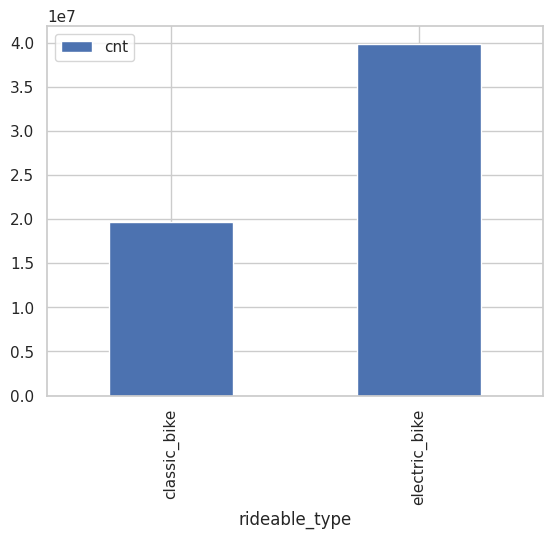

In [112]:
query = f"""
    SELECT rideable_type, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY rideable_type
"""

df = client.query(query).to_dataframe()
df.plot.bar(x='rideable_type', y='cnt')

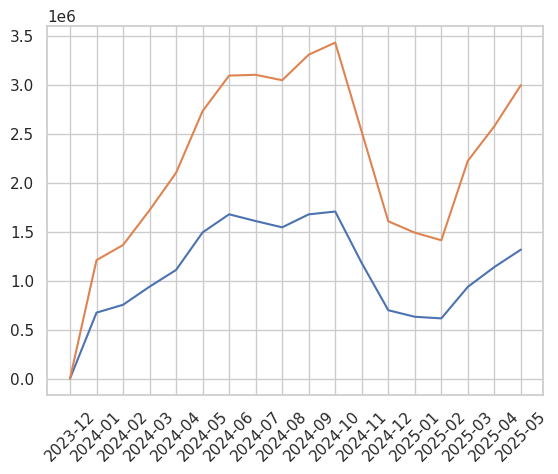

In [ ]:
query = f"""
    SELECT 
        FORMAT_TIMESTAMP('%Y-%m', started_at) AS year_month,
        rideable_type,
        COUNT(*) as cnt
    FROM {cleaned_table_ref}"""  """
    GROUP BY year_month, rideable_type
"""

df = client.query(query).to_dataframe()

df_classic = df[df['rideable_type'] == 'classic_bike']
df_electric = df[df['rideable_type'] == 'electric_bike']

df_classic = df_classic.sort_values(by='year_month')
df_electric = df_electric.sort_values(by='year_month')

plt.plot(df_classic['year_month'], df_classic['cnt'])
plt.plot(df_electric['year_month'], df_electric['cnt'])

plt.xticks(rotation=45)
plt.show()


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='hour'>

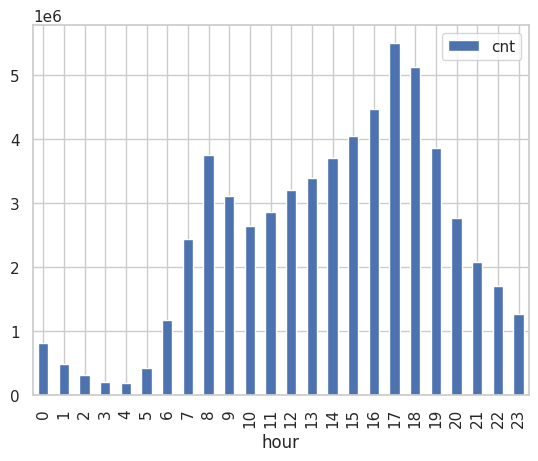

In [113]:
query = f"""
    SELECT EXTRACT(HOUR FROM started_at) as hour, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY hour
"""

df = client.query(query).to_dataframe()
df.sort_values(by='hour').plot.bar(x='hour', y='cnt')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='day_of_week'>

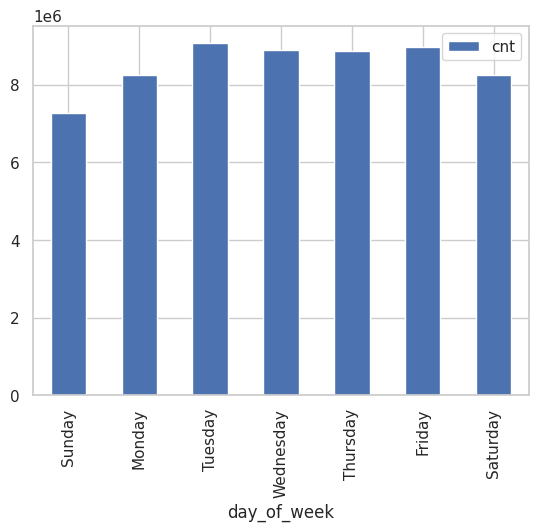

In [114]:
query = f"""
    SELECT EXTRACT(DAYOFWEEK FROM started_at) as day_of_week, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY day_of_week
"""

df = client.query(query).to_dataframe()
df = df.sort_values(by='day_of_week')

map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df['day_of_week'] = df['day_of_week'].apply(lambda x: map[x])
df.plot.bar(x='day_of_week', y='cnt')

In [78]:
query = f"""
    SELECT rideable_type, AVG(TIMESTAMP_DIFF(ended_at, started_at, MINUTE))
    FROM {cleaned_table_ref}
    GROUP BY rideable_type
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,rideable_type,f0_
0,electric_bike,11.903997
1,classic_bike,12.272856


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


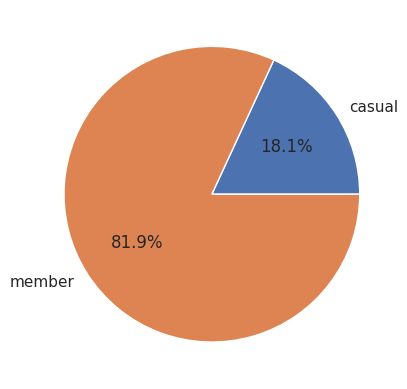

In [115]:
query = f"""
    SELECT member_casual, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY member_casual
"""

df = client.query(query).to_dataframe()

plt.pie(df['cnt'], labels=df['member_casual'], autopct='%1.1f%%')
plt.show()

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


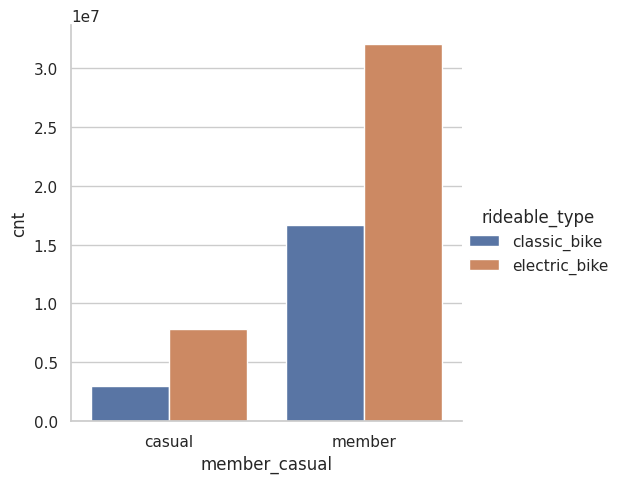

In [89]:
query = f"""
    SELECT member_casual, rideable_type, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY member_casual, rideable_type
"""

df = client.query(query).to_dataframe()

sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind='bar', x='member_casual', y='cnt', hue='rideable_type')

In [90]:
query = f"""
    SELECT member_casual, AVG(TIMESTAMP_DIFF(ended_at, started_at, MINUTE))
    FROM {cleaned_table_ref}
    GROUP BY member_casual
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,member_casual,f0_
0,casual,18.645249
1,member,10.561467


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


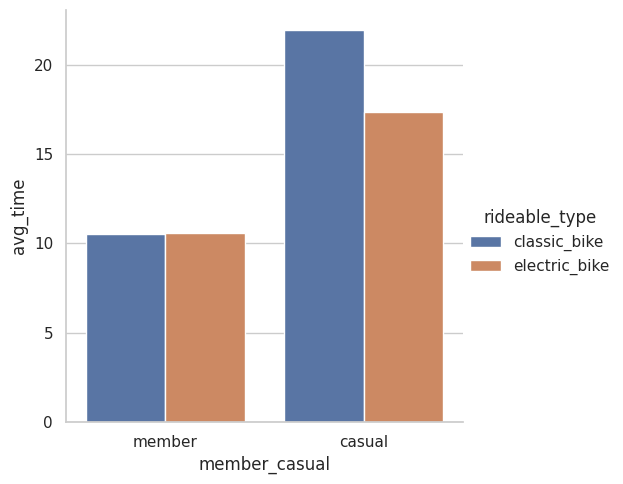

In [91]:
query = f"""
    SELECT member_casual, rideable_type, AVG(TIMESTAMP_DIFF(ended_at, started_at, MINUTE)) as avg_time
    FROM {cleaned_table_ref}
    GROUP BY member_casual, rideable_type
"""

df = client.query(query).to_dataframe()

sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind='bar', x='member_casual', y='avg_time', hue='rideable_type')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='hour', ylabel='cnt'>

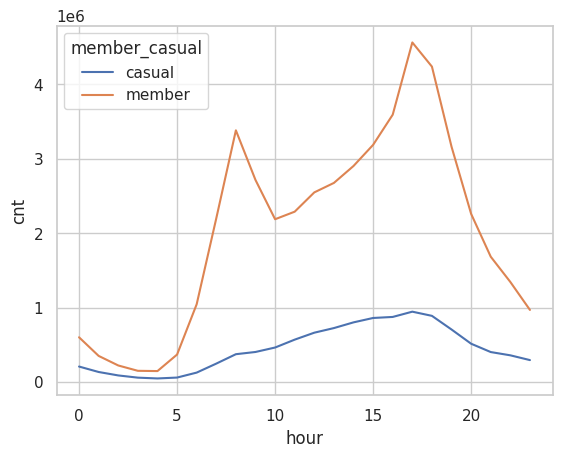

In [93]:
query = f"""
    SELECT member_casual, EXTRACT(HOUR FROM started_at) as hour, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY member_casual, hour
"""

df = client.query(query).to_dataframe()
sns.lineplot(data=df, x="hour", y="cnt", hue="member_casual")

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


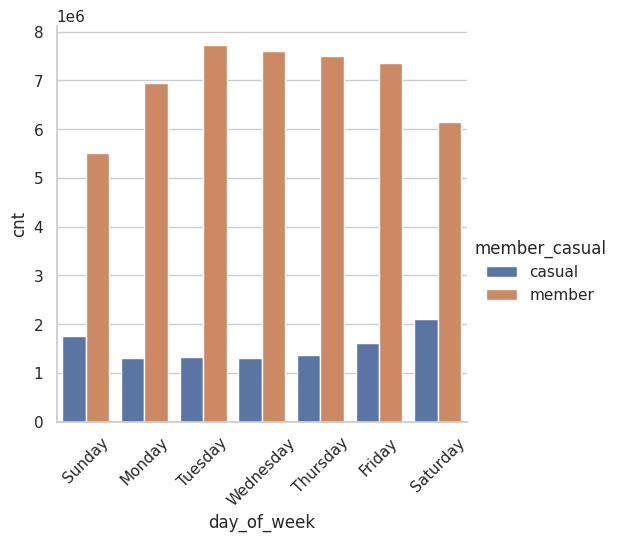

In [ ]:
query = f"""
    SELECT member_casual, EXTRACT(DAYOFWEEK FROM started_at) as day_of_week, COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY member_casual, day_of_week
"""

df = client.query(query).to_dataframe()
df = df.sort_values(by='day_of_week')

map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df['day_of_week'] = df['day_of_week'].apply(lambda x: map[x])
sns.catplot(data=df, kind='bar', x='day_of_week', y='cnt', hue='member_casual')

plt.xticks(rotation=45)
plt.show()

In [109]:
query = f"""
SELECT * FROM
    (SELECT start_station_name
    FROM {cleaned_table_ref}
    GROUP BY start_station_name
    ORDER BY COUNT(CASE WHEN member_casual = 'member' THEN 1 ELSE NULL END) DESC
    LIMIT 10) as member_start
        INNER JOIN (
    SELECT start_station_name
    FROM {cleaned_table_ref}
    GROUP BY start_station_name
    ORDER BY COUNT(CASE WHEN member_casual = 'casual' THEN 1 ELSE NULL END) DESC
    LIMIT 10) as casual_start
    ON member_start.start_station_name = casual_start.start_station_name
"""

df_start_station = client.query(query).to_dataframe()
df_start_station

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_name_1


In [110]:
query = f"""
SELECT * FROM
    (SELECT end_station_name
    FROM {cleaned_table_ref}
    GROUP BY end_station_name
    ORDER BY COUNT(CASE WHEN member_casual = 'member' THEN 1 ELSE NULL END) DESC
    LIMIT 10) as member_start
        INNER JOIN (
    SELECT end_station_name
    FROM {cleaned_table_ref}
    GROUP BY end_station_name
    ORDER BY COUNT(CASE WHEN member_casual = 'casual' THEN 1 ELSE NULL END) DESC
    LIMIT 10) as casual_start
    ON member_start.end_station_name = casual_start.end_station_name
"""

df_start_station = client.query(query).to_dataframe()
df_start_station

,end_station_name,end_station_name_1


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


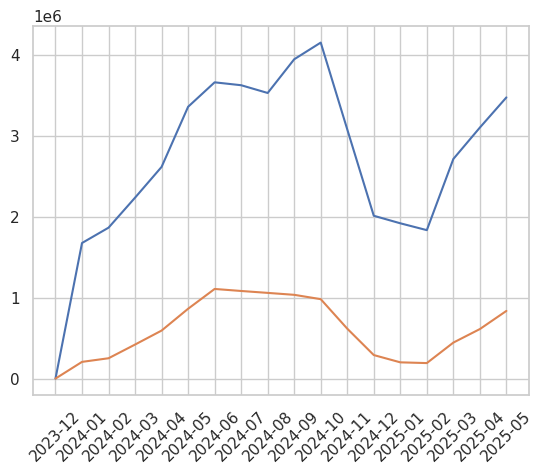

In [116]:
query = f"""
    SELECT 
        FORMAT_TIMESTAMP('%Y-%m', started_at) AS year_month,
        member_casual,
        COUNT(*) as cnt
    FROM {cleaned_table_ref}"""  """
    GROUP BY year_month, member_casual
"""

df = client.query(query).to_dataframe()

df_classic = df[df['member_casual'] == 'member']
df_electric = df[df['member_casual'] == 'casual']

df_classic = df_classic.sort_values(by='year_month')
df_electric = df_electric.sort_values(by='year_month')

plt.plot(df_classic['year_month'], df_classic['cnt'])
plt.plot(df_electric['year_month'], df_electric['cnt'])

plt.xticks(rotation=45)
plt.show()